In [13]:
# Importing libraries
import numpy as np
import pandas as pd

In [14]:
# Loading Customer Data

data = pd.read_csv("customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data.shape

(200, 5)

In [16]:
#  Check the number of cells in each column with null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

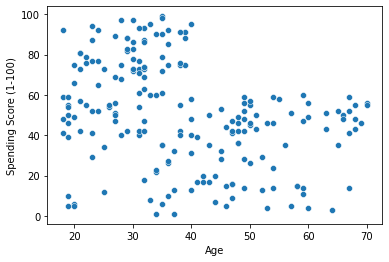

In [17]:
# Creating a scatter plot with Age as X and Spending Score as Y
import matplotlib.pyplot as plt
import seaborn as sns
x = data["Age"]
y = data["Spending Score (1-100)"]
scatter_plot = sns.scatterplot(x,y)
scatter_plot

In [18]:
# Drawing a scatter plot displaying data points colored on the basis of clusters.

data['Gender']=np.where(data['Gender']=='Male',1,0)

In [19]:
data.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

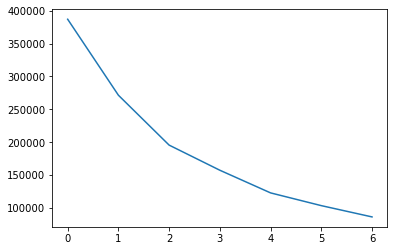

In [20]:
# Finding suitable value of cluster number
from sklearn.cluster import KMeans
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [21]:
# Number of cluster = 4
kmeans=KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [22]:
data['CustomerID'] = kmeans.labels_

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

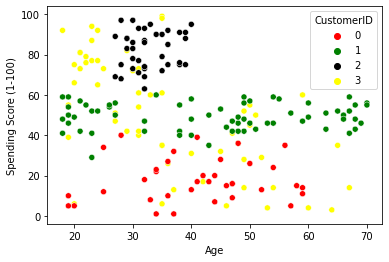

In [25]:
from matplotlib.colors import Colormap
sns.scatterplot(x,y, hue = data['CustomerID'],palette=['red','green','black','yellow'])